# 1.0_ss_chap6_batch_normalization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [59]:
from src import utils
import itertools
import logging
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.patches as patches
from collections import OrderedDict
%matplotlib inline

In [4]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

In [14]:
from src.ch06.batch_norm_test import main
from src.dataset.mnist import load_mnist
from src.common.multi_layer_net_extend import MultiLayerNetExtend
from src.common.optimizer import SGD, Adam

## From batch_norm_test.py

============== 1/16 ==============
epoch:0 | 0.1 - 0.117
epoch:1 | 0.097 - 0.102


/Users/shouta_shimizu/git/deep-learning-from-scrach/src/common/multi_layer_net_extend.py:121: RuntimeWarning: overflow encountered in square
  0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/shouta_shimizu/git/deep-learning-from-scrach/src/common/multi_layer_net_extend.py:121: RuntimeWarning: invalid value encountered in double_scalars
  0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/shouta_shimizu/git/deep-learning-from-scrach/src/common/functions.py:37: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
/Users/shouta_shimizu/git/deep-learning-from-scrach/src/common/layers.py:15: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/shouta_shimizu/.pyenv/versions/3.7.0/envs/deep-learning-from-scratch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:2 | 0.097 - 0.11
epoch:3 | 0.097 - 0.114
epoch:4 | 0.097 - 0.129
epoch:5 | 0.097 - 0.153
epoch:6 | 0.097 - 0.164
epoch:7 | 0.097 - 0.187
epoch:8 | 0.097 - 0.208
epoch:9 | 0.097 - 0.235
epoch:10 | 0.097 - 0.251
epoch:11 | 0.097 - 0.267
epoch:12 | 0.097 - 0.287
epoch:13 | 0.097 - 0.299
epoch:14 | 0.097 - 0.318
epoch:15 | 0.097 - 0.33
epoch:16 | 0.097 - 0.348
epoch:17 | 0.097 - 0.36
epoch:18 | 0.097 - 0.361
epoch:19 | 0.097 - 0.386


2018-11-23 12:07:41,602 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


============== 2/16 ==============
epoch:0 | 0.116 - 0.095
epoch:1 | 0.097 - 0.114
epoch:2 | 0.097 - 0.156
epoch:3 | 0.097 - 0.152
epoch:4 | 0.097 - 0.165
epoch:5 | 0.097 - 0.188
epoch:6 | 0.097 - 0.217
epoch:7 | 0.097 - 0.241
epoch:8 | 0.097 - 0.263
epoch:9 | 0.097 - 0.293
epoch:10 | 0.097 - 0.325
epoch:11 | 0.097 - 0.347
epoch:12 | 0.097 - 0.364
epoch:13 | 0.097 - 0.379
epoch:14 | 0.097 - 0.392
epoch:15 | 0.097 - 0.421
epoch:16 | 0.097 - 0.438
epoch:17 | 0.097 - 0.454


2018-11-23 12:07:43,741 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.472
epoch:19 | 0.097 - 0.488
============== 3/16 ==============
epoch:0 | 0.099 - 0.09
epoch:1 | 0.302 - 0.112
epoch:2 | 0.421 - 0.158
epoch:3 | 0.518 - 0.202
epoch:4 | 0.589 - 0.23
epoch:5 | 0.669 - 0.256
epoch:6 | 0.72 - 0.285
epoch:7 | 0.757 - 0.307
epoch:8 | 0.783 - 0.336
epoch:9 | 0.814 - 0.365
epoch:10 | 0.854 - 0.399
epoch:11 | 0.874 - 0.426
epoch:12 | 0.888 - 0.446
epoch:13 | 0.913 - 0.468
epoch:14 | 0.928 - 0.486
epoch:15 | 0.936 - 0.511
epoch:16 | 0.95 - 0.546
epoch:17 | 0.952 - 0.559
epoch:18 | 0.96 - 0.583


2018-11-23 12:07:46,017 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:19 | 0.967 - 0.61
============== 4/16 ==============
epoch:0 | 0.092 - 0.12
epoch:1 | 0.266 - 0.129
epoch:2 | 0.43 - 0.171
epoch:3 | 0.508 - 0.267
epoch:4 | 0.578 - 0.344
epoch:5 | 0.651 - 0.396
epoch:6 | 0.686 - 0.446
epoch:7 | 0.732 - 0.497
epoch:8 | 0.746 - 0.535
epoch:9 | 0.78 - 0.575
epoch:10 | 0.789 - 0.623
epoch:11 | 0.803 - 0.652
epoch:12 | 0.815 - 0.671
epoch:13 | 0.821 - 0.696
epoch:14 | 0.843 - 0.718
epoch:15 | 0.845 - 0.726
epoch:16 | 0.855 - 0.751
epoch:17 | 0.864 - 0.769


2018-11-23 12:07:48,310 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:18 | 0.882 - 0.785
epoch:19 | 0.879 - 0.791
============== 5/16 ==============
epoch:0 | 0.094 - 0.098
epoch:1 | 0.099 - 0.189
epoch:2 | 0.112 - 0.31
epoch:3 | 0.119 - 0.409
epoch:4 | 0.13 - 0.476
epoch:5 | 0.15 - 0.549
epoch:6 | 0.156 - 0.62
epoch:7 | 0.18 - 0.664
epoch:8 | 0.193 - 0.711
epoch:9 | 0.218 - 0.744
epoch:10 | 0.221 - 0.766
epoch:11 | 0.239 - 0.791
epoch:12 | 0.253 - 0.81
epoch:13 | 0.274 - 0.835
epoch:14 | 0.271 - 0.843
epoch:15 | 0.294 - 0.85
epoch:16 | 0.308 - 0.857
epoch:17 | 0.33 - 0.867
epoch:18 | 0.346 - 0.876


2018-11-23 12:07:50,736 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:19 | 0.362 - 0.887
============== 6/16 ==============
epoch:0 | 0.088 - 0.117
epoch:1 | 0.132 - 0.164
epoch:2 | 0.122 - 0.411
epoch:3 | 0.117 - 0.589
epoch:4 | 0.117 - 0.675
epoch:5 | 0.117 - 0.736
epoch:6 | 0.117 - 0.761
epoch:7 | 0.117 - 0.785
epoch:8 | 0.117 - 0.803
epoch:9 | 0.117 - 0.819
epoch:10 | 0.117 - 0.829
epoch:11 | 0.117 - 0.847
epoch:12 | 0.117 - 0.848
epoch:13 | 0.116 - 0.864
epoch:14 | 0.117 - 0.879
epoch:15 | 0.116 - 0.894
epoch:16 | 0.117 - 0.911
epoch:17 | 0.117 - 0.925
epoch:18 | 0.117 - 0.931


2018-11-23 12:07:53,264 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.942
============== 7/16 ==============
epoch:0 | 0.116 - 0.117
epoch:1 | 0.127 - 0.354
epoch:2 | 0.117 - 0.633
epoch:3 | 0.117 - 0.719
epoch:4 | 0.117 - 0.749
epoch:5 | 0.117 - 0.801
epoch:6 | 0.117 - 0.82
epoch:7 | 0.117 - 0.843
epoch:8 | 0.117 - 0.868
epoch:9 | 0.117 - 0.886
epoch:10 | 0.117 - 0.911
epoch:11 | 0.117 - 0.931
epoch:12 | 0.117 - 0.948
epoch:13 | 0.117 - 0.96
epoch:14 | 0.117 - 0.969
epoch:15 | 0.117 - 0.976
epoch:16 | 0.117 - 0.983
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.986


2018-11-23 12:07:55,641 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.987
============== 8/16 ==============
epoch:0 | 0.117 - 0.095
epoch:1 | 0.117 - 0.302
epoch:2 | 0.117 - 0.711
epoch:3 | 0.117 - 0.807
epoch:4 | 0.117 - 0.861
epoch:5 | 0.117 - 0.886
epoch:6 | 0.117 - 0.919
epoch:7 | 0.116 - 0.944
epoch:8 | 0.116 - 0.962
epoch:9 | 0.116 - 0.967
epoch:10 | 0.116 - 0.983
epoch:11 | 0.116 - 0.988
epoch:12 | 0.116 - 0.993
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999


2018-11-23 12:07:57,997 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.1 - 0.158
epoch:1 | 0.117 - 0.468
epoch:2 | 0.117 - 0.704
epoch:3 | 0.117 - 0.777
epoch:4 | 0.117 - 0.866
epoch:5 | 0.117 - 0.919
epoch:6 | 0.117 - 0.954
epoch:7 | 0.117 - 0.971
epoch:8 | 0.117 - 0.981
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


2018-11-23 12:08:00,389 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.107
epoch:1 | 0.116 - 0.667
epoch:2 | 0.116 - 0.826
epoch:3 | 0.116 - 0.816
epoch:4 | 0.116 - 0.859
epoch:5 | 0.116 - 0.889
epoch:6 | 0.117 - 0.885
epoch:7 | 0.117 - 0.933
epoch:8 | 0.116 - 0.946
epoch:9 | 0.116 - 0.949
epoch:10 | 0.116 - 0.979
epoch:11 | 0.116 - 0.992
epoch:12 | 0.116 - 0.995
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.999
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.998


2018-11-23 12:08:02,916 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.116 - 0.184
epoch:1 | 0.116 - 0.508
epoch:2 | 0.117 - 0.566
epoch:3 | 0.117 - 0.586
epoch:4 | 0.117 - 0.569
epoch:5 | 0.117 - 0.698
epoch:6 | 0.117 - 0.686
epoch:7 | 0.117 - 0.715
epoch:8 | 0.116 - 0.769
epoch:9 | 0.116 - 0.736
epoch:10 | 0.117 - 0.756
epoch:11 | 0.117 - 0.802
epoch:12 | 0.117 - 0.832
epoch:13 | 0.117 - 0.867
epoch:14 | 0.117 - 0.872
epoch:15 | 0.117 - 0.878
epoch:16 | 0.117 - 0.892
epoch:17 | 0.117 - 0.898
epoch:18 | 0.117 - 0.903


2018-11-23 12:08:05,276 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.897
============== 12/16 ==============
epoch:0 | 0.097 - 0.171
epoch:1 | 0.116 - 0.498
epoch:2 | 0.117 - 0.657
epoch:3 | 0.117 - 0.659
epoch:4 | 0.117 - 0.737
epoch:5 | 0.117 - 0.758
epoch:6 | 0.117 - 0.765
epoch:7 | 0.117 - 0.52
epoch:8 | 0.117 - 0.771
epoch:9 | 0.117 - 0.763
epoch:10 | 0.117 - 0.782
epoch:11 | 0.117 - 0.788
epoch:12 | 0.117 - 0.788
epoch:13 | 0.117 - 0.769
epoch:14 | 0.117 - 0.79
epoch:15 | 0.117 - 0.868
epoch:16 | 0.117 - 0.892
epoch:17 | 0.117 - 0.883


2018-11-23 12:08:07,953 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.896
epoch:19 | 0.117 - 0.899
============== 13/16 ==============
epoch:0 | 0.116 - 0.129
epoch:1 | 0.116 - 0.35
epoch:2 | 0.116 - 0.615
epoch:3 | 0.116 - 0.656
epoch:4 | 0.116 - 0.669
epoch:5 | 0.116 - 0.284
epoch:6 | 0.117 - 0.679
epoch:7 | 0.117 - 0.7
epoch:8 | 0.117 - 0.705
epoch:9 | 0.117 - 0.701
epoch:10 | 0.117 - 0.71
epoch:11 | 0.105 - 0.71
epoch:12 | 0.117 - 0.713
epoch:13 | 0.117 - 0.714
epoch:14 | 0.117 - 0.714
epoch:15 | 0.117 - 0.717
epoch:16 | 0.117 - 0.717
epoch:17 | 0.117 - 0.715


2018-11-23 12:08:10,348 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.717
epoch:19 | 0.117 - 0.717
============== 14/16 ==============
epoch:0 | 0.087 - 0.183
epoch:1 | 0.117 - 0.275
epoch:2 | 0.117 - 0.495
epoch:3 | 0.116 - 0.455
epoch:4 | 0.116 - 0.465
epoch:5 | 0.117 - 0.508
epoch:6 | 0.117 - 0.524
epoch:7 | 0.117 - 0.524
epoch:8 | 0.117 - 0.327
epoch:9 | 0.117 - 0.545
epoch:10 | 0.117 - 0.521
epoch:11 | 0.117 - 0.533
epoch:12 | 0.117 - 0.517
epoch:13 | 0.117 - 0.521
epoch:14 | 0.117 - 0.518
epoch:15 | 0.117 - 0.526
epoch:16 | 0.117 - 0.532
epoch:17 | 0.117 - 0.536
epoch:18 | 0.117 - 0.52


2018-11-23 12:08:12,650 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.531
============== 15/16 ==============
epoch:0 | 0.097 - 0.117
epoch:1 | 0.117 - 0.303
epoch:2 | 0.117 - 0.369
epoch:3 | 0.117 - 0.388
epoch:4 | 0.117 - 0.413
epoch:5 | 0.117 - 0.423
epoch:6 | 0.117 - 0.443
epoch:7 | 0.117 - 0.422
epoch:8 | 0.117 - 0.421
epoch:9 | 0.117 - 0.448
epoch:10 | 0.117 - 0.456
epoch:11 | 0.117 - 0.48
epoch:12 | 0.117 - 0.481
epoch:13 | 0.117 - 0.511
epoch:14 | 0.117 - 0.499
epoch:15 | 0.117 - 0.481
epoch:16 | 0.117 - 0.446
epoch:17 | 0.117 - 0.51


2018-11-23 12:08:15,035 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.531
epoch:19 | 0.117 - 0.545
============== 16/16 ==============
epoch:0 | 0.1 - 0.1
epoch:1 | 0.105 - 0.224
epoch:2 | 0.117 - 0.319
epoch:3 | 0.117 - 0.394
epoch:4 | 0.117 - 0.405
epoch:5 | 0.117 - 0.424
epoch:6 | 0.117 - 0.431
epoch:7 | 0.117 - 0.406
epoch:8 | 0.117 - 0.429
epoch:9 | 0.117 - 0.428
epoch:10 | 0.116 - 0.426
epoch:11 | 0.117 - 0.366
epoch:12 | 0.117 - 0.417
epoch:13 | 0.117 - 0.425
epoch:14 | 0.117 - 0.429
epoch:15 | 0.117 - 0.431
epoch:16 | 0.117 - 0.43
epoch:17 | 0.117 - 0.431
epoch:18 | 0.117 - 0.433
epoch:19 | 0.116 - 0.431


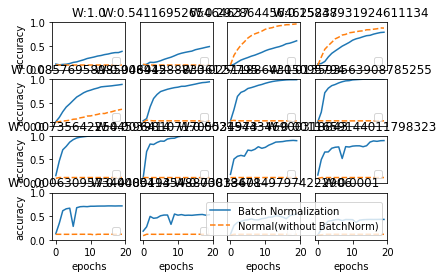

In [12]:
main()

## Write it

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [16]:
# Use only 1000
x_train = x_train[:1000]
t_train = t_train[:1000]

In [41]:
weight_init_std = 1 

### Training

In [42]:
# initialize
network = MultiLayerNetExtend(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100, 100], 
        output_size=10, 
        weight_init_std=weight_init_std, 
        use_batchnorm=True)

In [44]:
def train_network(network, x_train, t_train,
                  batch_size = 100,
                  max_epochs = 20,
                  learning_rate=0.01):
        
        # initialize
        train_size = x_train.shape[0]
        optimizer = SGD(lr = learning_rate)

        # input values
        train_acc_list = []
        iter_per_epoch = max(train_size/batch_size, 1)
        epoch_cnt = 0
        i = 0

        # will train for max_epochs
        while epoch_cnt < max_epochs:
                # count loop
                i += 1

                # batch mask
                batch_mask = np.random.choice(train_size, batch_size)
                x_batch = x_train[batch_mask]
                t_batch = t_train[batch_mask]

                # update
                grads = network.gradient(x_batch, t_batch)
                optimizer.update(network.params, grads)

                # add accuracy
                if i % iter_per_epoch == 0:
                        train_acc = network.accuracy(x_train, t_train)
                        train_acc_list.append(train_acc)
                        logger.info(f"epoch: {epoch_cnt}")
                        logger.info(f"train_acc: {train_acc}")
                        epoch_cnt += 1
        
        return train_acc_list

In [45]:
train_network(network, x_train, t_train)

2018-11-23 12:53:13,222 - root - INFO - epoch: 0
2018-11-23 12:53:13,222 - root - INFO - train_acc: 0.109
2018-11-23 12:53:13,295 - root - INFO - epoch: 1
2018-11-23 12:53:13,296 - root - INFO - train_acc: 0.097
2018-11-23 12:53:13,378 - root - INFO - epoch: 2
2018-11-23 12:53:13,378 - root - INFO - train_acc: 0.111
2018-11-23 12:53:13,449 - root - INFO - epoch: 3
2018-11-23 12:53:13,450 - root - INFO - train_acc: 0.13
2018-11-23 12:53:13,529 - root - INFO - epoch: 4
2018-11-23 12:53:13,530 - root - INFO - train_acc: 0.136
2018-11-23 12:53:13,612 - root - INFO - epoch: 5
2018-11-23 12:53:13,613 - root - INFO - train_acc: 0.164
2018-11-23 12:53:13,685 - root - INFO - epoch: 6
2018-11-23 12:53:13,685 - root - INFO - train_acc: 0.181
2018-11-23 12:53:13,757 - root - INFO - epoch: 7
2018-11-23 12:53:13,757 - root - INFO - train_acc: 0.205
2018-11-23 12:53:13,828 - root - INFO - epoch: 8
2018-11-23 12:53:13,829 - root - INFO - train_acc: 0.234
2018-11-23 12:53:13,903 - root - INFO - epoch: 

[0.109,
 0.097,
 0.111,
 0.13,
 0.136,
 0.164,
 0.181,
 0.205,
 0.234,
 0.258,
 0.28,
 0.302,
 0.319,
 0.322,
 0.337,
 0.358,
 0.368,
 0.378,
 0.4,
 0.409]

## Loop on weights and network

In [47]:
import itertools

In [57]:
use_batchnorms = [True, False]
weight_scale_list = np.logspace(0, -4, num=16)

results = [] 
for use_batchnorm, weight_init_std in \
    itertools.product(use_batchnorms, weight_scale_list):
        logger.info(f"weight: {weight_init_std}")
        logger.info(f"use_batchnorm: {use_batchnorm}")
        
        # initialize
        network = MultiLayerNetExtend(
                input_size=784,
                hidden_size_list=[100, 100, 100, 100, 100], 
                output_size=10, 
                weight_init_std=weight_init_std, 
                use_batchnorm=use_batchnorm)
        
        train_loss = train_network(network, x_train, t_train)
        
        # append results
        d = dict()
        d['weight_init_std'] = weight_init_std
        d['use_batchnorm'] = use_batchnorm
        d['train_loss'] = train_loss
        results.append(d)

2018-11-23 13:49:14,385 - root - INFO - weight: 1.0
2018-11-23 13:49:14,390 - root - INFO - use_batchnorm: True
2018-11-23 13:49:14,515 - root - INFO - epoch: 0
2018-11-23 13:49:14,516 - root - INFO - train_acc: 0.13
2018-11-23 13:49:14,592 - root - INFO - epoch: 1
2018-11-23 13:49:14,592 - root - INFO - train_acc: 0.131
2018-11-23 13:49:14,676 - root - INFO - epoch: 2
2018-11-23 13:49:14,677 - root - INFO - train_acc: 0.143
2018-11-23 13:49:14,761 - root - INFO - epoch: 3
2018-11-23 13:49:14,762 - root - INFO - train_acc: 0.158
2018-11-23 13:49:14,835 - root - INFO - epoch: 4
2018-11-23 13:49:14,835 - root - INFO - train_acc: 0.18
2018-11-23 13:49:14,922 - root - INFO - epoch: 5
2018-11-23 13:49:14,923 - root - INFO - train_acc: 0.196
2018-11-23 13:49:14,994 - root - INFO - epoch: 6
2018-11-23 13:49:14,995 - root - INFO - train_acc: 0.215
2018-11-23 13:49:15,069 - root - INFO - epoch: 7
2018-11-23 13:49:15,070 - root - INFO - train_acc: 0.236
2018-11-23 13:49:15,141 - root - INFO - ep

## Plot

In [74]:
df = pd.DataFrame.from_dict(results)

In [86]:
pd.options.display.max_rows = 5

In [87]:
df

,train_loss,use_batchnorm,weight_init_std
0,"[0.13, 0.131, 0.143, 0.158, 0.18, 0.196, 0.215...",True,1.000000
1,"[0.082, 0.092, 0.122, 0.138, 0.169, 0.204, 0.2...",True,0.541170
...,...,...,...
30,"[0.117, 0.116, 0.116, 0.117, 0.117, 0.117, 0.1...",False,0.000185
31,"[0.116, 0.116, 0.117, 0.116, 0.116, 0.116, 0.1...",False,0.000100


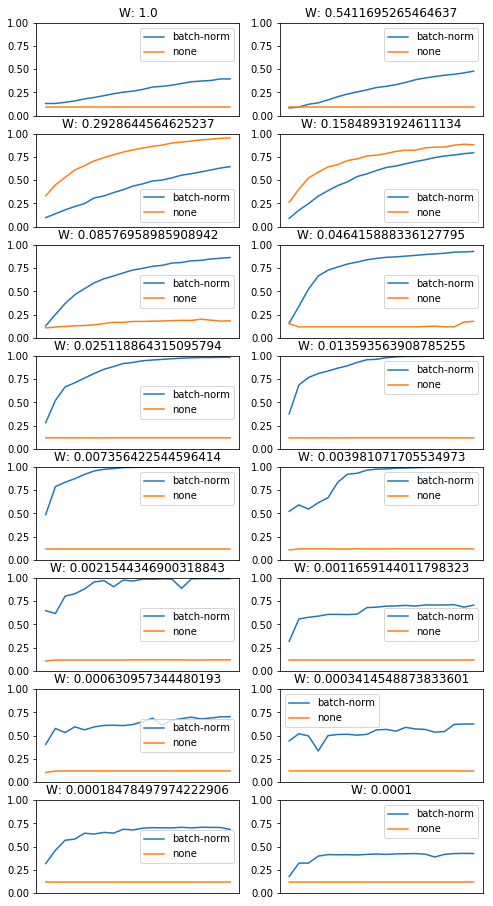

In [139]:
i = 0
fig, ax = plt.subplots(figsize=(8, 16))
for weight_init_std in weight_scale_list:
        i += 1
        y1 = df.loc[(df.use_batchnorm==True)&\
                    (df.weight_init_std==weight_init_std), 'train_loss']

        y2 = df.loc[(df.use_batchnorm==False)&\
                    (df.weight_init_std==weight_init_std), 'train_loss']
        plt.subplot(8, 2, i)
        plt.plot(x, y1.values.tolist()[0], label='batch-norm')
        plt.plot(x, y2.values.tolist()[0], label='none')
        plt.ylim(0, 1)
        plt.title(f"W: {weight_init_std}")
        plt.legend()
        plt.xticks([])